In [1]:
#数据加载
import pandas as pd
import numpy as np
data1 = pd.read_csv('task1_data1.csv')
data1.head()

,x,y
0,-10.0,0.544021
1,-9.8,0.366479
2,-9.6,0.174327
3,-9.4,-0.024775
4,-9.2,-0.222890


In [2]:
#X y赋值
X = data1.loc[:,'x']
y = data1.loc[:,'y']
X.head()
y.head()

0    0.544021
1    0.366479
2    0.174327
3   -0.024775
4   -0.222890
Name: y, dtype: float64

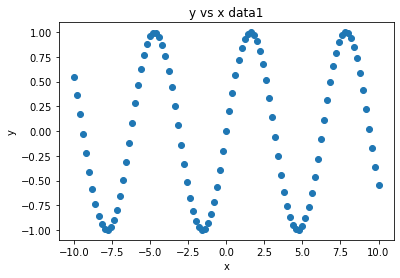

In [3]:
#数据可视化
from matplotlib import pyplot as plt
fig1 = plt.figure()
plt.scatter(X,y)
plt.title('y vs x data1')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [4]:
#维度确认
print(X.shape,y.shape)

(101,) (101,)


In [5]:
X = np.array(X).reshape(-1,1)

In [6]:
#建立模型
from keras.models import Sequential
from keras.layers import Dense
model1 = Sequential()
model1.add(Dense(units=50,input_dim=1,activation='relu'))
model1.add(Dense(units=50,activation='relu'))
model1.add(Dense(units=1,activation='linear'))
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                100       
_________________________________________________________________
dense_1 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 2,701
Trainable params: 2,701
Non-trainable params: 0
_________________________________________________________________


In [7]:
#参数配置
model1.compile(optimizer='adam',loss='mean_squared_error')
model1.fit(X,y,epochs=2500)

Epoch 1/2500
4/4 [==============================] - 0s 0s/step - loss: 0.9209
Epoch 2/2500
4/4 [==============================] - 0s 0s/step - loss: 0.5559
Epoch 3/2500
4/4 [==============================] - 0s 0s/step - loss: 0.4816
Epoch 4/2500
4/4 [==============================] - 0s 0s/step - loss: 0.4771
Epoch 5/2500
4/4 [==============================] - 0s 0s/step - loss: 0.5002
Epoch 6/2500
4/4 [==============================] - 0s 0s/step - loss: 0.4691
Epoch 7/2500
4/4 [==============================] - 0s 0s/step - loss: 0.4596
Epoch 8/2500
4/4 [==============================

In [8]:
#模型表现评估
y_predict = model1.predict(X)
from sklearn.metrics import r2_score
r2 = r2_score(y,y_predict)
print(r2)

0.998876584525015


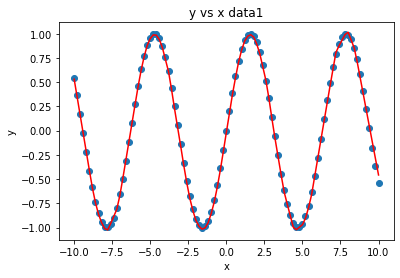

In [9]:
fig2 = plt.figure()
plt.scatter(X,y,label='raw data')
plt.plot(X,y_predict,'r',label='predict data')
plt.title('y vs x data1')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [15]:
data2 = pd.read_csv('task1_data2.csv')
x_new = data2.loc[:,'x']
y_new = data2.loc[:,'y']

In [16]:
x_new = np.array(x_new).reshape(-1,1)

In [17]:
print(x_new.shape)

(88, 1)


In [18]:
#迁移学习前预测
y_new_predict = model1.predict(x_new)
r2_new = r2_score(y_new,y_new_predict)
print(r2_new)

-4.237291109942602


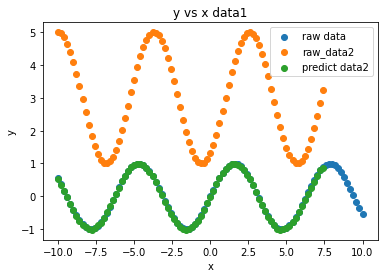

In [19]:
fig3 = plt.figure()
plt.scatter(X,y,label='raw data')
plt.scatter(x_new,y_new,label='raw_data2')
plt.scatter(x_new,y_new_predict,label='predict data2')
plt.title('y vs x data1')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [20]:
#模型迁移学习
model1.fit(x_new,y_new,epochs=20)

Epoch 1/20
3/3 [==============================] - 0s 997us/step - loss: 8.0363
Epoch 2/20
3/3 [==============================] - 0s 665us/step - loss: 1.9988
Epoch 3/20
3/3 [==============================] - 0s 665us/step - loss: 2.9154
Epoch 4/20
3/3 [==============================] - 0s 665us/step - loss: 2.3100
Epoch 5/20
3/3 [==============================] - 0s 663us/step - loss: 1.0423
Epoch 6/20
3/3 [==============================] - 0s 665us/step - loss: 1.1158
Epoch 7/20
3/3 [==============================] - 0s 665us/step - loss: 1.2027
Epoch 8/20
3/3 [==============================] - 0s 665us/s

0.8847621824875146


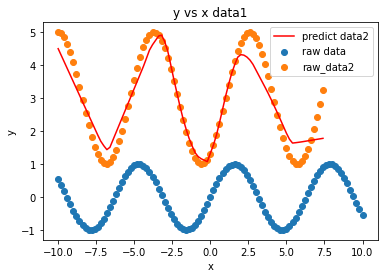

In [21]:
y_new_predict = model1.predict(x_new)
r2_new = r2_score(y_new,y_new_predict)
print(r2_new)
fig4 = plt.figure()
plt.scatter(X,y,label='raw data')
plt.scatter(x_new,y_new,label='raw_data2')
plt.plot(x_new,y_new_predict,label='predict data2',c='r')
plt.title('y vs x data1')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
